# **DEEP LEARNING COURSE PROJECT (IMAGE CLASSIFICATION)**

### **NAME:** ANISH SRIRAM B S
### **SCHOOL:** SCDS
### **EMAIL:** anishsriram.b-26@scds.saiuniversity.edu.in

## FINE TUNING - XCEPTION MODEL

### LOADING THE DATASET

### Details:

*   Total Number of Images in the Dataset: 1661
*   Number of Images present per class:
    *   Number of Images in Motorbikes: 500
    *   Number of Images in Airplanes: 500
    *   Number of Images in Schooner: 63
*   Total Number of Images used for Training and Testing: 1063
    *   Number of Images used for Training: 797
    *   Number of Images used for Testing: 266












In [26]:
# Importing necessary modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [28]:
# Loading the dataset which is already processed
X_train_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_test_std.npy')
y_train = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_train.npy')
y_test = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_test.npy')

print("X_train_std_shape:",X_train_std.shape)
print("X_test_std_shape:",X_test_std.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

X_train_std_shape: (797, 299, 299, 3)
X_test_std_shape: (266, 299, 299, 3)
y_train_shape: (797,)
y_test_shape: (266,)


### LOADING THE TRANSFER LEARNING MODEL

In [29]:
# Loading the saved best TL model
model_1_FT = keras.models.load_model('/content/drive/MyDrive/Deep Learning Project/Model1/Best_model_1_TL.keras')
model_1_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, None, None, 32) │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, None, None, 32) │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, None, None, 64) │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, None, None, 64) │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, None, None, 64) │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, None, None,     │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, None, None,     │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, None, None,     │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, None, None,     │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, None, None,     │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None,     │          8,192 │ block1_conv2_act[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, None, None,     │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │ 128)                   │                │                        │
├──────────────────────

 Total params: 20,896,307 (79.71 MB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 20,865,576 (79.60 MB)

 Optimizer params: 20,488 (80.04 KB)

### FINE TUNING

In [30]:
tot_layers = len(model_1_FT.layers) # Total layers in the model
nontrain_layers = int(tot_layers*0.25) # Computing 25% of the total layers in the model

# Setting the initial 25% of the layers of the model as non trainable and remaining layers as trainable
for layer in model_1_FT.layers[:nontrain_layers]:
  layer.trainable=False
for layer in model_1_FT.layers[nontrain_layers:]:
  layer.trainable=True

In [31]:
# Compiling the model
model_1_FT.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Saving the best model using Callbacks
callbacks_1_FT = [keras.callbacks.ModelCheckpoint("Best_Model_1_FT.weights.h5",monitor="val_accuracy",save_weights_only=True,save_best_only=True)]

# Training the model
train_model_1_FT = model_1_FT.fit(x=X_train_std,y=y_train,epochs=10,validation_split=0.1,batch_size=16,callbacks=callbacks_1_FT)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 735ms/step - accuracy: 0.9752 - loss: 0.1431 - val_accuracy: 0.8000 - val_loss: 1.6932
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.9918 - loss: 0.0409 - val_accuracy: 0.6000 - val_loss: 4.0105
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 367ms/step - accuracy: 0.9815 - loss: 0.0559 - val_accuracy: 0.8125 - val_loss: 0.5898
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0316
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.9965 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 3.3992e-04
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.9950 - loss: 0.0192 - val_accuracy: 0.5250 - val_loss: 6.7910
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - accuracy: 0.9914 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - accuracy: 0.9953 - loss: 0.0237 - val_

### GENERATING CONFUSION MATRIX

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step


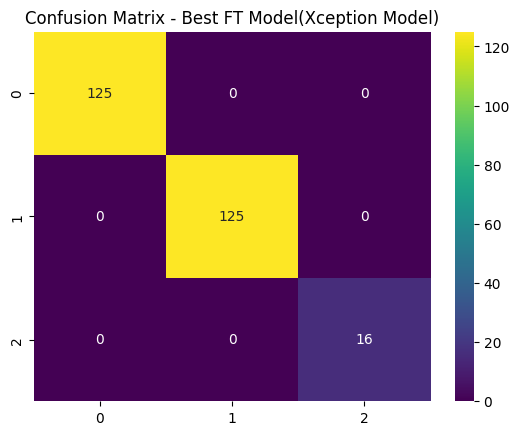

In [32]:
# Updating the model with best weights
model_1_FT.load_weights("Best_Model_1_FT.weights.h5")

# Getting the Prediction of the testing data
prob = model_1_FT.predict(X_test_std)
y_pred = np.argmax(prob,axis=1)

confmat_model1 = confusion_matrix(y_test, y_pred) # Generating the confusion matrix
sns.heatmap(confmat_model1, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Best FT Model(Xception Model)')
plt.show()



### GENERATING THE PRECISION, RECALL, F1 SCORE

In [33]:
precision_model1 = precision_score(y_test, y_pred,average='weighted') # Computing the precision score
recall_model1 = recall_score(y_test, y_pred,average='weighted') # Computing the recall score
f1_model1 = f1_score(y_test, y_pred,average='weighted') # Computing the F1 score

# Displaying the Classification Report
print("\nClassification Report - Best FT Model(Xception Model)")
print(classification_report(y_test, y_pred,target_names=["Motorbikes","Airplanes","Schooners"]))
print("Precison Score:",precision_model1)
print("Recall Score:",recall_model1)
print("F1 Score:",f1_model1)



Classification Report - Best FT Model(Xception Model)
              precision    recall  f1-score   support

  Motorbikes       1.00      1.00      1.00       125
   Airplanes       1.00      1.00      1.00       125
   Schooners       1.00      1.00      1.00        16

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Precison Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
